In [4]:
desktop_path <- "C:/Users/roshn/OneDrive/Desktop/wordcloud.txt"  # Adjust this path to match your desktop directory

dir.create(desktop_path, recursive = TRUE)

download.file("https://ibm.box.com/shared/static/cmid70rpa7xe4ocitcga1bve7r0kqnia.txt",
              destfile = file.path(desktop_path, "churchill_speeches.txt"), quiet = TRUE)


In [5]:
# Installing the required packages
install.packages("tm") # for text mining
install.packages("wordcloud") # word-cloud generator

also installing the dependencies ‘NLP’, ‘slam’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [6]:
# Loading the libraries into the environment.
library(tm)
library(wordcloud) 

Loading required package: NLP
Loading required package: RColorBrewer


In [7]:
# Select the directory that our text is located
dirPath <- "C:/Users/roshn/OneDrive/Desktop/wordcloud.txt"
# Load the data as a corpus
speech <- Corpus(DirSource(dirPath))

In [8]:
inspect(speech)

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 1

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [9]:
#clean the text

In [10]:
# Convert the text to lower case
speech <- tm_map(speech, content_transformer(tolower))

# Remove numbers
speech <- tm_map(speech, removeNumbers)

# Remove english common stopwords
speech <- tm_map(speech, removeWords, stopwords("english"))

# Remove your own stop word
# specify your stopwords as a character vector
speech <- tm_map(speech, removeWords, c("floccinaucinihilipification", "squirrelled")) 

# Remove punctuations
speech <- tm_map(speech, removePunctuation)

# Eliminate extra white spaces
speech <- tm_map(speech, stripWhitespace)


In [11]:
# Create a Term Document Matrix
dtm <- TermDocumentMatrix(speech)

# Matrix transformation
m <- as.matrix(dtm)

#Sort it to show the most frequent words
v <- sort(rowSums(m),decreasing=TRUE)

#transform to a data frame
d <- data.frame(word = names(v),freq=v)
head(d, 10)

,word,freq
,<fct>,<dbl>
shall,shall,11
fight,fight,7
may,may,6
will,will,6
europe,europe,5
upon,upon,5
victory,victory,5
war,war,5
can,can,4


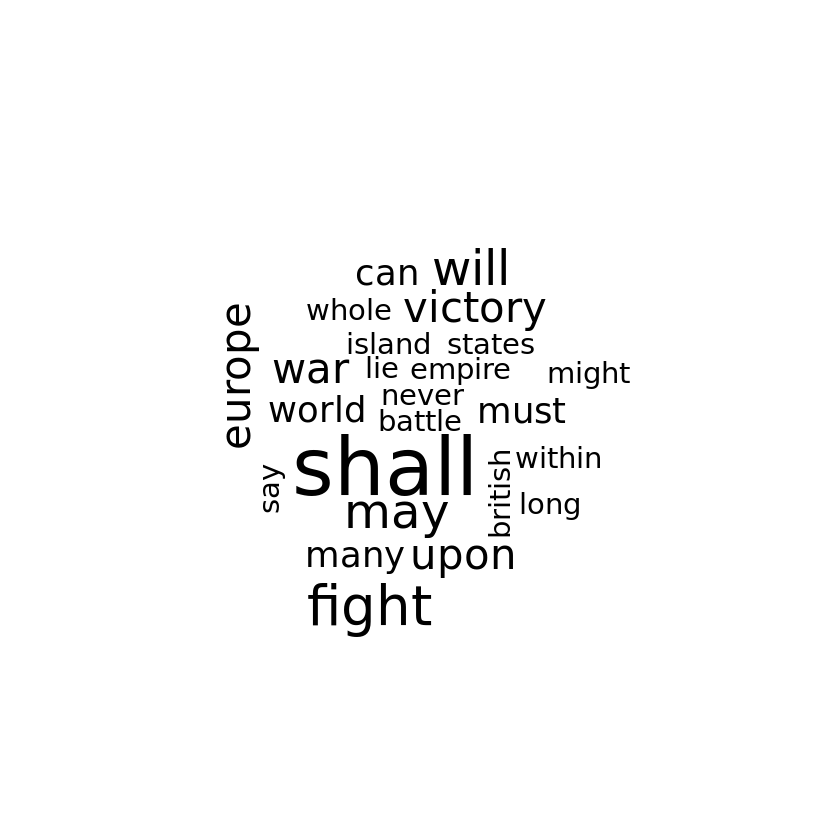

In [12]:
wordcloud(words = d$word, freq = d$freq)

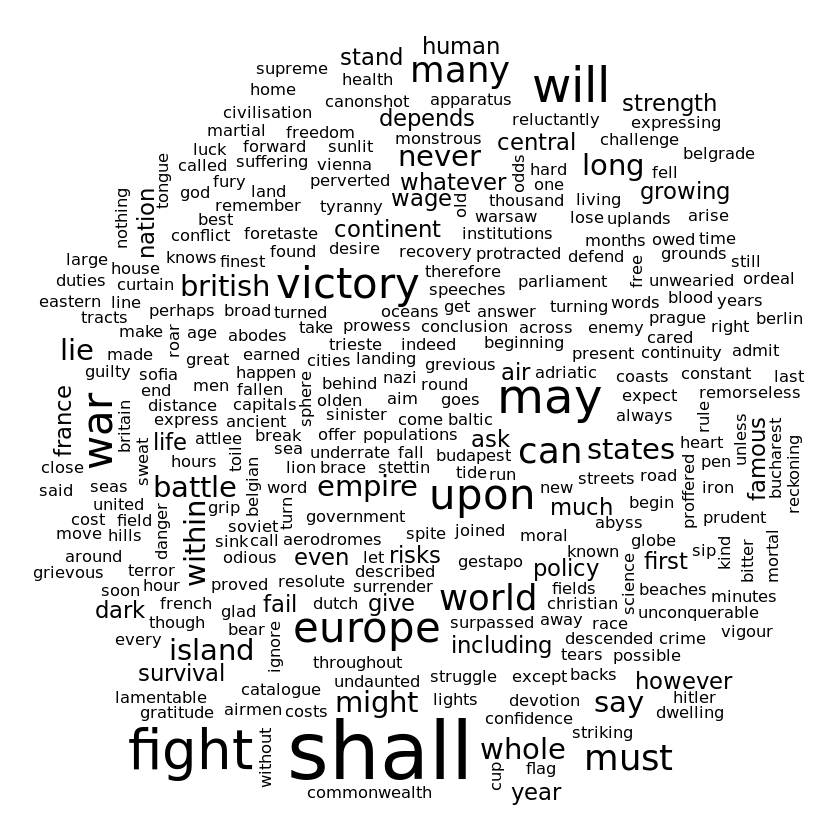

In [13]:
wordcloud(words = d$word, freq = d$freq, min.freq=1)

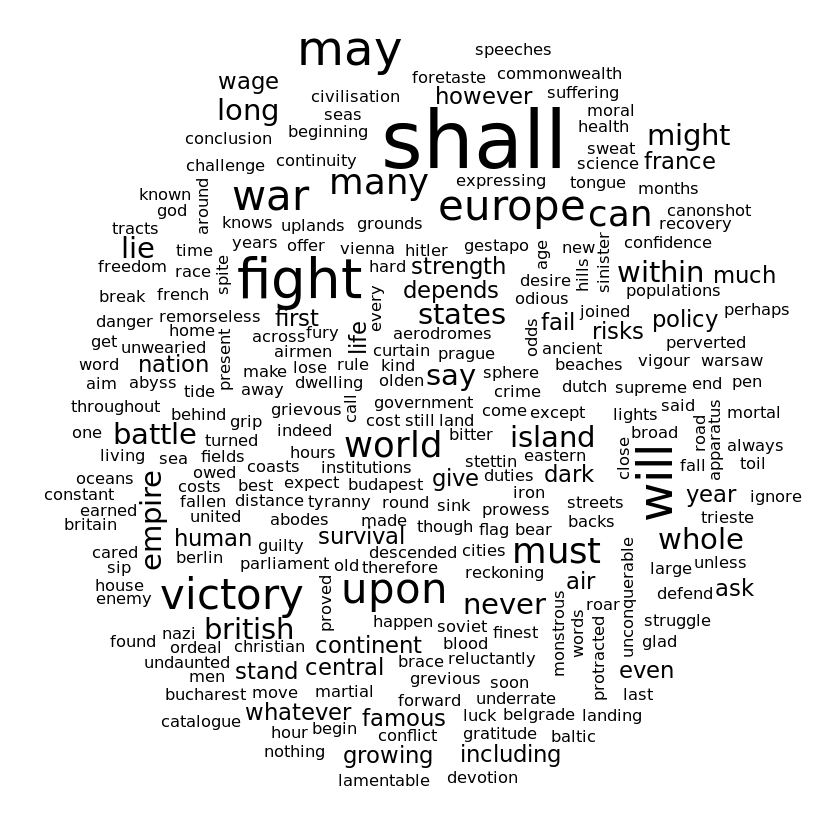

In [14]:
wordcloud(words = d$word, freq = d$freq, min.freq = 1,
                    max.words=250)

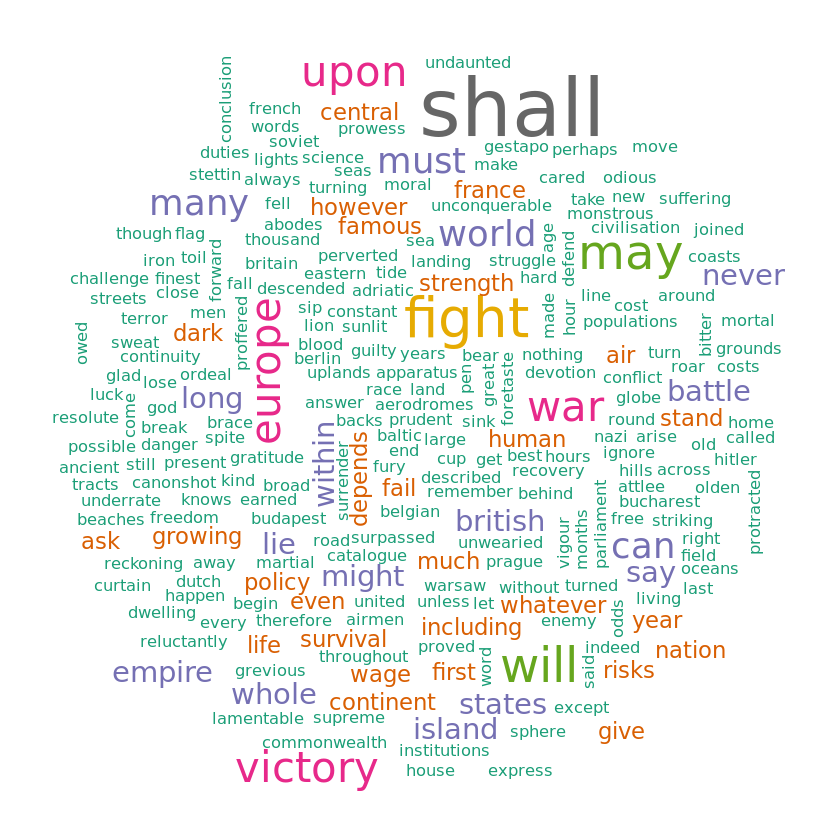

In [15]:
wordcloud(words = d$word, freq = d$freq, min.freq = 1,
                    max.words=250, colors=brewer.pal(8, "Dark2"))

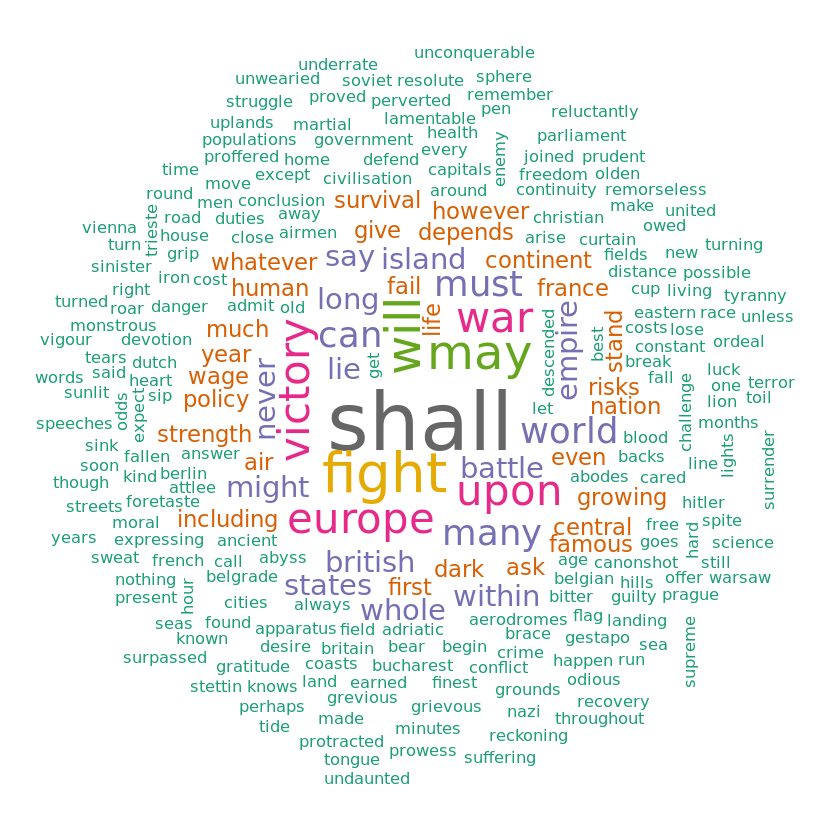

In [16]:
wordcloud(words = d$word, freq = d$freq, min.freq = 1,
                    max.words=250, colors=brewer.pal(8, "Dark2"),
                    random.order = FALSE )